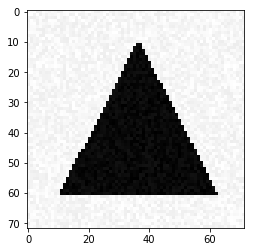

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]



# Partie 1 - Simple classification

In [7]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [8]:
X_train[0]

array([ 0.99773842,  0.95474101,  0.99235939, ...,  0.94048148,
        0.95347374,  0.96823073])

In [9]:
Y_train = np_utils.to_categorical(Y_train,3)
X_train, Y_train

(array([[ 0.99773842,  0.95474101,  0.99235939, ...,  0.94048148,
          0.95347374,  0.96823073],
        [ 0.93629763,  0.97787279,  0.99469653, ...,  0.98605856,
          0.93794543,  0.99063502],
        [ 0.99149558,  0.99350975,  0.97582845, ...,  0.98767464,
          0.95186302,  0.9566027 ],
        ..., 
        [ 0.94076221,  0.97047209,  0.9752595 , ...,  0.99548418,
          0.96176647,  0.99576542],
        [ 0.9463509 ,  0.96590299,  0.99420764, ...,  0.95965353,
          0.96545159,  0.99030882],
        [ 0.9528998 ,  0.95488202,  0.97474224, ...,  0.96826054,
          0.9531674 ,  0.98457734]]), array([[ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.]

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_train.shape

(300, 5184)

In [11]:
from keras.models import Sequential 
from keras import utils
model = Sequential()

from keras.layers import Dense, Activation, Flatten

model.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam)


model.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
300/300 [==============================] - 0s 315us/step - loss: 1.6624
Epoch 2/40
300/300 [==============================] - 0s 129us/step - loss: 0.8032
Epoch 3/40
300/300 [==============================] - 0s 153us/step - loss: 0.5759
Epoch 4/40
300/300 [==============================] - 0s 143us/step - loss: 0.4045
Epoch 5/40
300/300 [==============================] - 0s 128us/step - loss: 0.3818
Epoch 6/40
300/300 [==============================] - 0s 120us/step - loss: 0.3070
Epoch 7/40
300/300 [==============================] - 0s 126us/step - loss: 0.2793
Epoch 8/40
300/300 [==============================] - 0s 138us/step - loss: 0.2388
Epoch 9/40
300/300 [==============================] - 0s 124us/step - loss: 0.1988
Epoch 10/40
300/300 [==============================] - 0s 127us/step - loss: 0.2091
Epoch 11/40
300/300 [==============================] - 0s 136us/step - loss: 0.1577
Epoch 12/40
300/300 [==============================] - 0s 134us/step - loss: 0.1714
E

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [13]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)


array([[ 0.,  1.,  0.]], dtype=float32)

# Partie 2 - Visualization of the solution

In [14]:
weights = model.get_weights()
weightMat = np.asarray(weights[0])

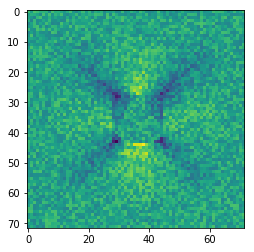

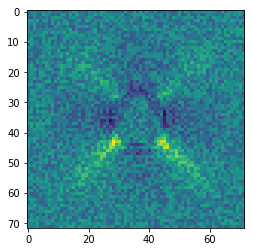

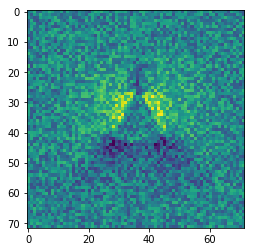

In [15]:
plt.imshow(weightMat[:,0].reshape(72,72),interpolation='none')
plt.figure()
plt.imshow(weightMat[:,1].reshape(72,72),interpolation='none')
plt.figure()
plt.imshow(weightMat[:,2].reshape(72,72),interpolation='none')

# Partie 3 - A More Difficult Classification Problem

In [16]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = utils.np_utils.to_categorical(Y_train,3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


## Classifieur linéaire

In [17]:
from keras.models import Sequential 
from keras import utils
model2 = Sequential()

from keras.layers import Dense, Activation, Flatten

model2.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model2.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
300/300 [==============================] - 0s 338us/step - loss: 2.0551 - acc: 0.3167
Epoch 2/40
300/300 [==============================] - 0s 133us/step - loss: 1.1969 - acc: 0.4033
Epoch 3/40
300/300 [==============================] - 0s 123us/step - loss: 1.1760 - acc: 0.4133
Epoch 4/40
300/300 [==============================] - 0s 138us/step - loss: 1.0033 - acc: 0.4733
Epoch 5/40
300/300 [==============================] - 0s 135us/step - loss: 0.9709 - acc: 0.5133
Epoch 6/40
300/300 [==============================] - 0s 152us/step - loss: 0.9296 - acc: 0.5433
Epoch 7/40
300/300 [==============================] - 0s 134us/step - loss: 0.9407 - acc: 0.4867
Epoch 8/40
300/300 [==============================] - 0s 125us/step - loss: 0.8994 - acc: 0.5567
Epoch 9/40
300/300 [==============================] - 0s 133us/step - loss: 0.8446 - acc: 0.5900
Epoch 10/40
300/300 [==============================] - 0s 127us/step - loss: 0.9782 - acc: 0.5233
Epoch 11/40
300/300 [========

In [18]:
[X_test, Y_test] = generate_test_set_classification()
model2.evaluate(X_test, Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 100us/step


[1.0138840635617574, 0.54999999920527143]

## CNN

In [19]:
X_train.shape
X_train = X_train.reshape(X_train.shape[0],72,72,1)

In [20]:
from keras.models import Sequential 
from keras import utils
model3 = Sequential()

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
history = History()

model3.add(Conv2D(16, (5,5), input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])   )    )
model3.add( MaxPooling2D() )
model3.add(Flatten())
model3.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model3.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model3.fit(X_train, Y_train, epochs=25, batch_size=32,  callbacks=[history])



Epoch 1/25
300/300 [==============================] - 1s 3ms/step - loss: 1.3791 - acc: 0.3733
Epoch 2/25
300/300 [==============================] - 1s 3ms/step - loss: 1.0185 - acc: 0.4900
Epoch 3/25
300/300 [==============================] - 1s 3ms/step - loss: 0.9192 - acc: 0.6067
Epoch 4/25
300/300 [==============================] - 1s 3ms/step - loss: 0.8312 - acc: 0.6967
Epoch 5/25
300/300 [==============================] - 1s 3ms/step - loss: 0.7505 - acc: 0.7700
Epoch 6/25
300/300 [==============================] - 1s 3ms/step - loss: 0.6916 - acc: 0.8033
Epoch 7/25
300/300 [==============================] - 1s 3ms/step - loss: 0.6747 - acc: 0.7433
Epoch 8/25
300/300 [==============================] - 1s 3ms/step - loss: 0.6183 - acc: 0.8033
Epoch 9/25
300/300 [==============================] - 1s 3ms/step - loss: 0.5765 - acc: 0.8067
Epoch 10/25
300/300 [==============================] - 1s 3ms/step - loss: 0.5439 - acc: 0.8633
Epoch 11/25
300/300 [============================

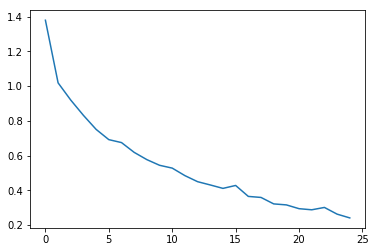

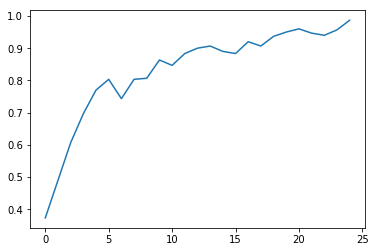

In [21]:
plt.plot(history.history['loss'])
plt.figure()
plt.plot(history.history['acc'])

In [ ]:
[X_test, Y_test] = generate_test_set_classification()
model3.evaluate(X_test, Y_test)

## Big Fat CNN

In [22]:
#TODO

# Partie 4 - Regression

In [23]:
[X_train, Y_train] = generate_dataset_regression(300, 20)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


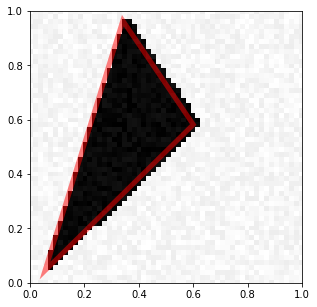

In [24]:
visualize_prediction(X_train[1], Y_train[1])

In [50]:
X_train = X_train.reshape(X_train.shape[0],72*72)
X_train.shape

(300, 5184)

In [51]:
X_train.shape[1]

5184

In [64]:
from keras.models import Sequential 
from keras import utils
model4 = Sequential()

from keras.layers import Dense, Activation, Flatten, Dropout


model4.add(Dense(100, input_shape = (X_train.shape[1],),activation = 'relu'))
model4.add(Dropout(0.4))
model4.add(Dense(6, activation = 'linear'))

#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model4.compile(loss='logcosh', optimizer=adam)


model4.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
300/300 [==============================] - 0s 1ms/step - loss: 1.6560
Epoch 2/200
300/300 [==============================] - 0s 526us/step - loss: 0.1396
Epoch 3/200
300/300 [==============================] - 0s 513us/step - loss: 0.1228
Epoch 4/200
300/300 [==============================] - 0s 482us/step - loss: 0.1167
Epoch 5/200
300/300 [==============================] - 0s 574us/step - loss: 0.1100
Epoch 6/200
300/300 [==============================] - 0s 531us/step - loss: 0.1049
Epoch 7/200
300/300 [==============================] - 0s 535us/step - loss: 0.0998
Epoch 8/200
300/300 [==============================] - 0s 512us/step - loss: 0.0995
Epoch 9/200
300/300 [==============================] - 0s 528us/step - loss: 0.0987
Epoch 10/200
300/300 [==============================] - 0s 523us/step - loss: 0.0917
Epoch 11/200
300/300 [==============================] - 0s 512us/step - loss: 0.0909
Epoch 12/200
300/300 [==============================] - 0s 502us/step - loss

300/300 [==============================] - 0s 451us/step - loss: 0.0407
Epoch 98/200
300/300 [==============================] - 0s 504us/step - loss: 0.0402
Epoch 99/200
300/300 [==============================] - 0s 443us/step - loss: 0.0410
Epoch 100/200
300/300 [==============================] - 0s 465us/step - loss: 0.0406
Epoch 101/200
300/300 [==============================] - 0s 468us/step - loss: 0.0403
Epoch 102/200
300/300 [==============================] - 0s 458us/step - loss: 0.0402
Epoch 103/200
300/300 [==============================] - 0s 450us/step - loss: 0.0403
Epoch 104/200
300/300 [==============================] - 0s 467us/step - loss: 0.0398
Epoch 105/200
300/300 [==============================] - 0s 452us/step - loss: 0.0408
Epoch 106/200
300/300 [==============================] - 0s 557us/step - loss: 0.0407
Epoch 107/200
300/300 [==============================] - 0s 621us/step - loss: 0.0412
Epoch 108/200
300/300 [==============================] - 0s 594us/step

300/300 [==============================] - 0s 424us/step - loss: 0.0398
Epoch 193/200
300/300 [==============================] - 0s 402us/step - loss: 0.0403
Epoch 194/200
300/300 [==============================] - 0s 417us/step - loss: 0.0402
Epoch 195/200
300/300 [==============================] - 0s 410us/step - loss: 0.0401
Epoch 196/200
300/300 [==============================] - 0s 412us/step - loss: 0.0399
Epoch 197/200
300/300 [==============================] - 0s 408us/step - loss: 0.0402
Epoch 198/200
300/300 [==============================] - 0s 433us/step - loss: 0.0398
Epoch 199/200
300/300 [==============================] - 0s 417us/step - loss: 0.0398
Epoch 200/200
300/300 [==============================] - 0s 432us/step - loss: 0.0395


In [28]:
Y_train

array([[  9.17014941e-01,   1.87301544e-01,   1.63837063e-01,
          8.68932650e-01,   8.51839530e-01,   2.64340715e-01],
       [  5.47973159e-02,   4.48144634e-02,   3.41259094e-01,
          9.64522283e-01,   6.00344370e-01,   5.82273507e-01],
       [  5.91773914e-01,   6.55125977e-01,   8.28597570e-01,
          4.39996637e-01,   9.46166571e-01,   3.61513053e-01],
       ..., 
       [  7.04759373e-01,   6.71115676e-01,   6.01493116e-01,
          5.65298967e-01,   9.59509840e-01,   6.99165651e-02],
       [  9.81529460e-01,   7.30845517e-01,   1.19658628e-01,
          6.06943115e-01,   8.23647658e-02,   6.72925867e-01],
       [  8.07061665e-01,   6.76762245e-01,   3.84007323e-01,
          7.81502556e-01,   6.62123166e-04,   3.30588043e-01]])

In [54]:
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(X_test.shape[0],72*72)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [59]:
Y_test = model4.predict(X_test)

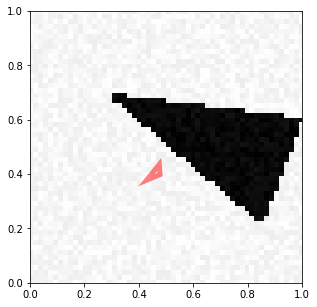

In [61]:
i=10
visualize_prediction(X_test[i], Y_test[i])

In [31]:
Y_test[0]

array([ 0.70676231,  0.6411882 ,  0.74981934,  0.67158461,  0.70711857,
        0.49935946], dtype=float32)

In [32]:
Y_train.shape

(300, 6)

In [33]:
Y_test[0]

array([ 0.70676231,  0.6411882 ,  0.74981934,  0.67158461,  0.70711857,
        0.49935946], dtype=float32)

In [34]:
Y_train[0]

array([ 0.91701494,  0.18730154,  0.16383706,  0.86893265,  0.85183953,
        0.26434072])

In [35]:
np_utils.to_categorical(Y_train[3], 3) 

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])